# Telecom Customer Churn

#### Dataset information:
 * Customers who left within the last month - the column is called Churn
 * Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 * Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 * Demographic info about customers - gender, age range, and if they have partners and dependents

#### Questions

* Who are more likely to churn?
* What can we do to retain customer?
* Were there any patterns or trends in customer churn?
* What can we do better?

#### Goal
To develop a more focused customer retention program

Data Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


## Explore Data

In [2]:
#Load dataset
df = pd.read_csv('Telecom Data/Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Drop customer ID, do not need
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Convert to proper data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#Check for missing values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Drop missing values because it is only 0.16% of data
df_clean = df.dropna()
#Check
df_clean.isna().sum()

#Export csv
df_clean.to_csv('telcom_churn.csv', index=False)

## Exploratory Data Analysis

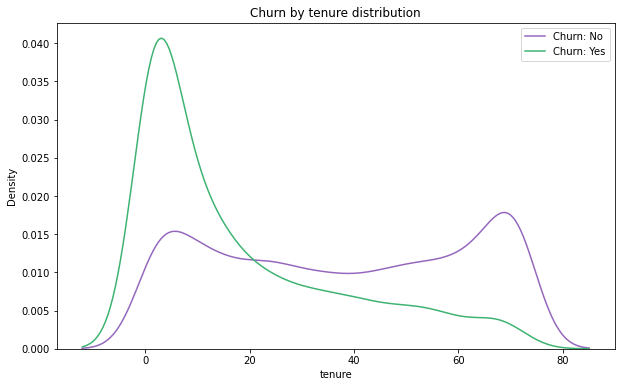

In [9]:
#Continous variables
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['tenure'], color='tab:purple', label='Churn: No')
sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['tenure'], color='mediumseagreen', label='Churn: Yes')
plt.legend()
plt.title("Churn by tenure distribution")
plt.show()

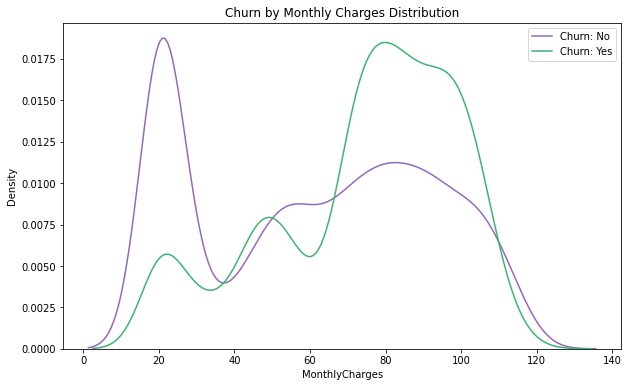

In [10]:
#continuous variable: monthly charges
fig1, ax1 = plt.subplots(figsize=(10,6))
sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'], color='tab:purple', label='Churn: No')
sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'], color='mediumseagreen', label='Churn: Yes')
plt.legend()
plt.title("Churn by Monthly Charges Distribution")
plt.show()


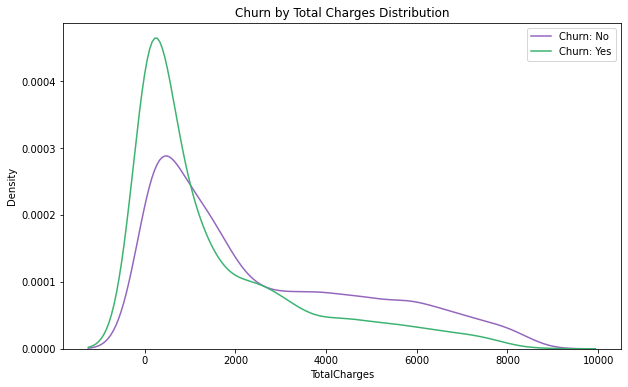

In [11]:
#continuous variable: Total charges
fig2, ax2 = plt.subplots(figsize=(10,6))
sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['TotalCharges'], color='tab:purple', label='Churn: No')
sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['TotalCharges'], color='mediumseagreen', label='Churn: Yes')
plt.legend()
plt.title("Churn by Total Charges Distribution")
plt.show()

In [12]:
def plotCount(column):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=column, data=df_clean, hue='Churn', palette=['tab:purple', 'mediumseagreen'])
    plt.title("Churn by {}".format(column))
    plt.show()

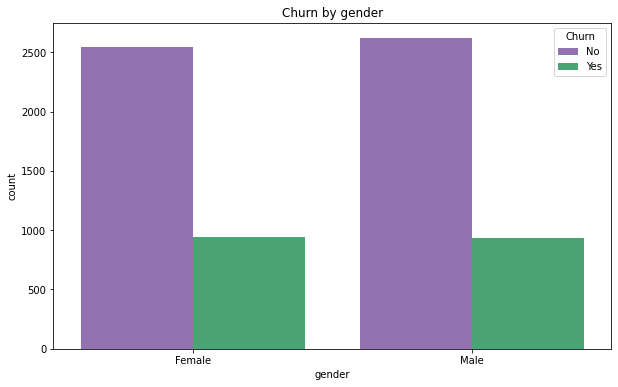

In [13]:
#Demographics
plotCount('gender')

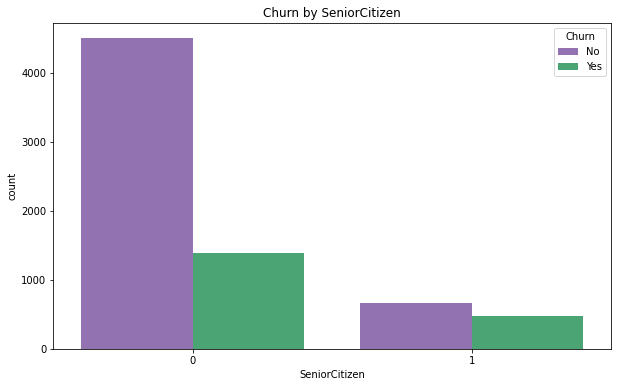

In [14]:
#Demographics: Senior Citizen
plotCount('SeniorCitizen')

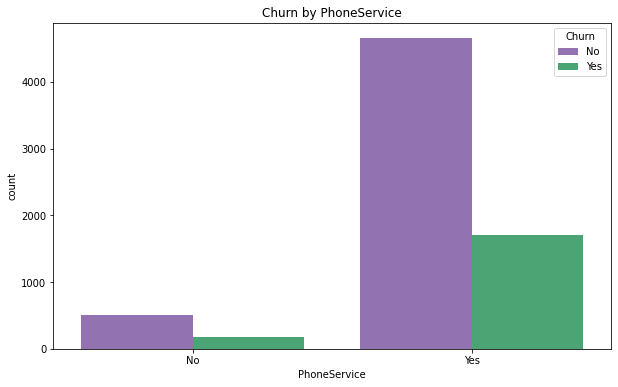

In [15]:
#Categorical Variables
plotCount('PhoneService')

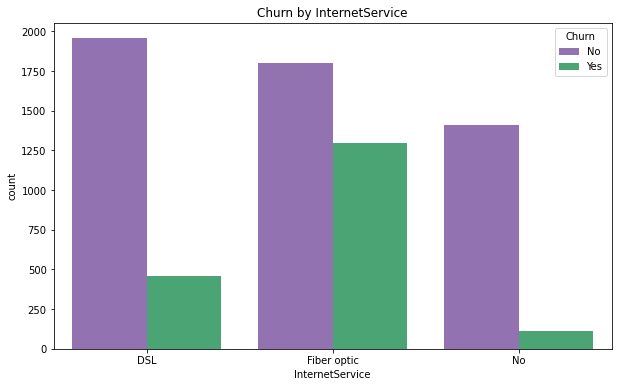

In [16]:
#Categorical Variables
plotCount('InternetService')

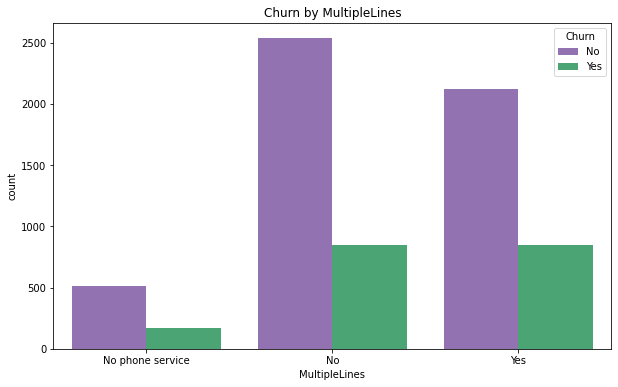

In [17]:
#Categorical Variables

plotCount('MultipleLines')

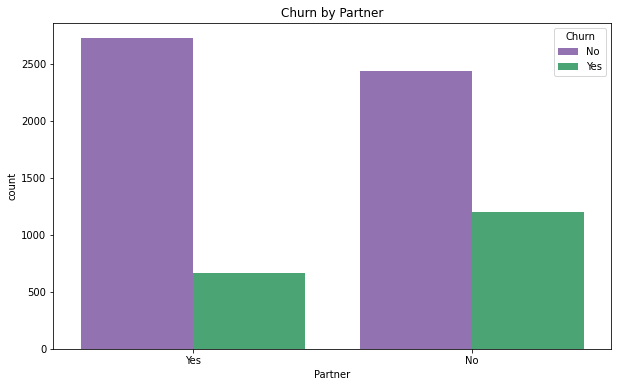

In [18]:
#Categorical Variables
plotCount('Partner')

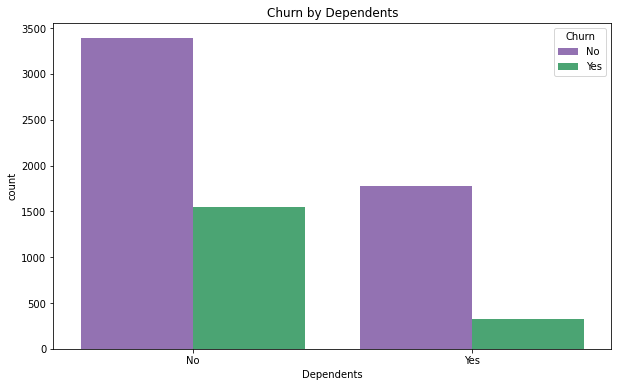

In [19]:
#Categorical Variables
plotCount('Dependents')

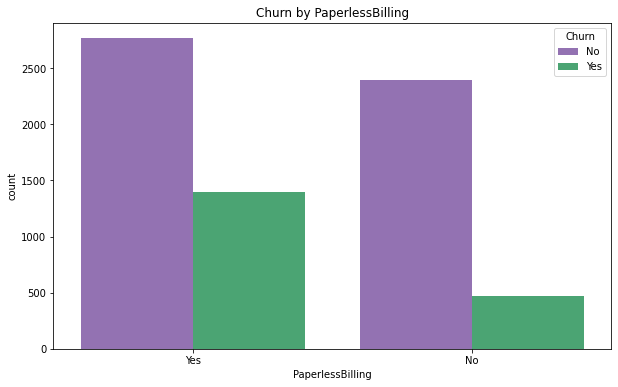

In [20]:
#Categorical Variables
plotCount('PaperlessBilling')

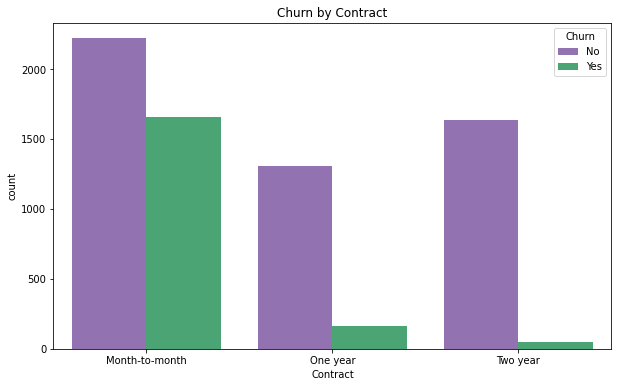

In [21]:
#Categorical Variables
plotCount('Contract')

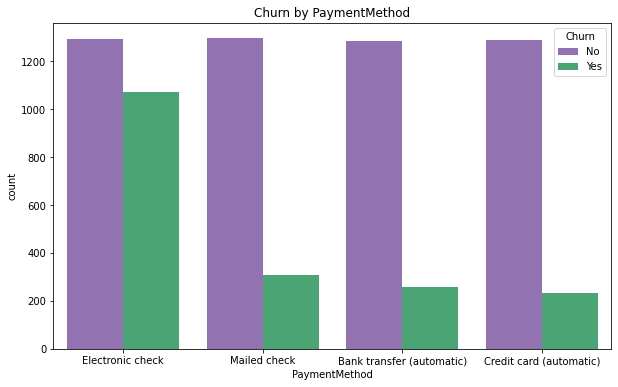

In [22]:
plotCount('PaymentMethod')

In [23]:
churn_count = df_clean.groupby('Churn').count().reset_index()

churn_count['Proportion'] = 100*churn_count['gender'] / churn_count['gender'].sum()
churn_count[['Churn', 'Proportion']]

,Churn,Proportion
0,No,73.421502
1,Yes,26.578498


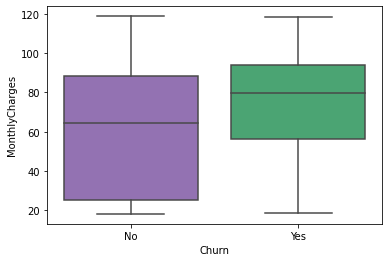

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean, palette=['tab:purple', 'mediumseagreen'])
plt.show()

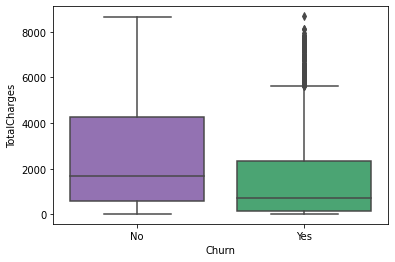

In [25]:
sns.boxplot(x='Churn', y='TotalCharges', data=df_clean, palette=['tab:purple', 'mediumseagreen'])
plt.show()

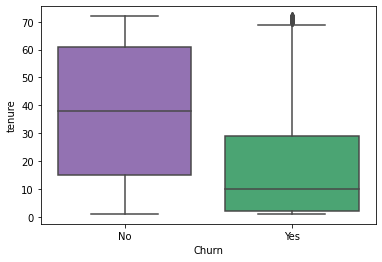

In [26]:
sns.boxplot(x='Churn', y='tenure', data=df_clean, palette=['tab:purple', 'mediumseagreen'])
plt.show()

In [27]:
df_clean.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# Logistic Regression

In [28]:
df_clean.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [29]:
# new dataframe for logistic regression
# replace no phone service to no and no internet service to no
df_lr = df_clean
df_lr['MultipleLines'].replace('No phone service', 'No', inplace=True)
df_lr['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
df_lr['OnlineBackup'].replace('No internet service', 'No', inplace=True)
df_lr['DeviceProtection'].replace('No internet service', 'No', inplace=True)
df_lr['TechSupport'].replace('No internet service', 'No', inplace=True)
df_lr['StreamingTV'].replace('No internet service', 'No', inplace=True)
df_lr['StreamingMovies'].replace('No internet service', 'No', inplace=True)

df_lr['Partner'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['Dependents'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['PhoneService'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['MultipleLines'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['OnlineSecurity'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['OnlineBackup'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['DeviceProtection'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['TechSupport'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['StreamingTV'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['StreamingMovies'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['PaperlessBilling'].replace(['Yes', 'No'], [1,0], inplace=True)
df_lr['Churn'].replace(['Yes', 'No'], [1,0], inplace=True)



C:\Python39\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
# gender_dummies = pd.get_dummies(df_lr['gender'], prefix='Gender').iloc[:, 1:]
# internet_dummies = pd.get_dummies(df_lr['InternetService'], prefix='InternetService').iloc[:, 1:]
# contract_dummies = pd.get_dummies(df_lr['Contract'], prefix='Contract').iloc[:, 1:]
# payment_dummies = pd.get_dummies(df_lr['PaymentMethod'], prefix='PaymentMethod').iloc[:, 1:]

df_lr_dummy = pd.get_dummies(df_lr, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [33]:
df_lr_dummy.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,0,0,1,0,...,820.50,1,0,1,0,0,0,0,1,0
6,0,0,1,22,1,1,0,1,0,0,...,1949.40,0,1,1,0,0,0,1,0,0
7,0,0,0,10,0,0,1,0,0,0,...,301.90,0,0,0,0,0,0,0,0,1
8,0,1,0,28,1,1,0,0,1,1,...,3046.05,1,0,1,0,0,0,0,1,0
9,0,0,1,62,1,0,1,1,0,0,...,3487.95,0,1,0,0,1,0,0,0,0


In [35]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = list(set(df_lr_dummy.columns) - set(numeric_cols) - {'Churn'})
print(numeric_cols)
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']
['TechSupport', 'PaymentMethod_Electronic check', 'PaperlessBilling', 'MultipleLines', 'Partner', 'InternetService_No', 'OnlineSecurity', 'PaymentMethod_Credit card (automatic)', 'DeviceProtection', 'OnlineBackup', 'Dependents', 'Contract_One year', 'SeniorCitizen', 'StreamingMovies', 'gender_Male', 'StreamingTV', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Mailed check', 'PhoneService']


In [37]:
#Split training and test data
random_seed = 888
df_train, df_test = train_test_split(df_lr_dummy, test_size=0.2, random_state=random_seed, stratify=df_lr_dummy['Churn'])

print(df_train.shape)
print(df_test.shape)
print(df_train['Churn'].value_counts(normalize=True))
print(df_test['Churn'].value_counts(normalize=True))

(5625, 24)
(1407, 24)
0    0.734222
1    0.265778
Name: Churn, dtype: float64
0    0.734186
1    0.265814
Name: Churn, dtype: float64


In [40]:
#Fit the logistic regression model
def get_features_and_target_arrays(df, numeric_cols, cat_cols):
    X_numeric = df_lr_dummy[numeric_cols]
    X_categorical = df_lr_dummy[cat_cols]
    X = np.hstack((X_categorical, X_numeric))
    y = df_lr_dummy['Churn']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols)

In [44]:
clf = LogisticRegression(penalty='none', max_iter=300)

clf.fit(X, y)

LogisticRegression(max_iter=300, penalty='none')

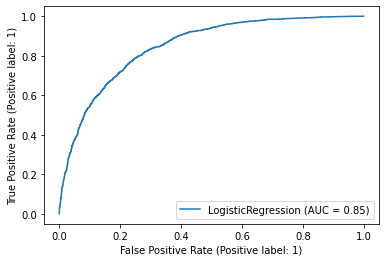

In [53]:
plot_roc_curve(clf, X, y)

In [51]:
train_prob = clf.predict_proba(X)[:, 1]
train_pred = clf.predict(X)

In [52]:
print('Log loss = {:.5f}'.format(log_loss(y, train_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y, train_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y, train_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y, train_pred)))
print('Precision = {:.5f}'.format(precision_score(y, train_pred)))
print('Recall = {:.5f}'.format(recall_score(y, train_pred)))
print('F1 score = {:.5f}'.format(f1_score(y, train_pred)))

print('\nClassification Report')
print(classification_report(y, train_pred))

Log loss = 0.41449
AUC = 0.84798
Average Precision = 0.66134

Using 0.5 as threshold:
Accuracy = 0.80575
Precision = 0.66029
Recall = 0.55431
F1 score = 0.60268

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.75      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



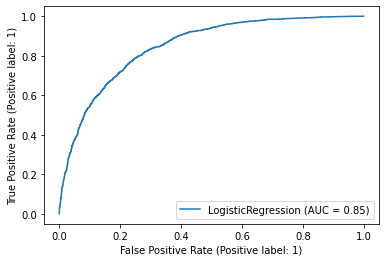

In [47]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols)

plot_roc_curve(clf, X_test, y_test)

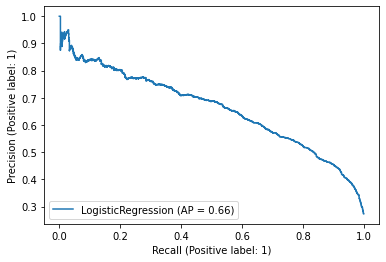

In [48]:
plot_precision_recall_curve(clf, X_test, y_test)

In [49]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [50]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.41449
AUC = 0.84798
Average Precision = 0.66134

Using 0.5 as threshold:
Accuracy = 0.80575
Precision = 0.66029
Recall = 0.55431
F1 score = 0.60268

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.75      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



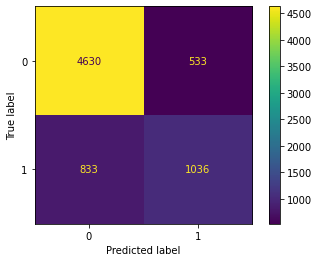

In [54]:
plot_confusion_matrix(clf, X_test, y_test)

In [55]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.133817
1,TechSupport,-0.441693
2,PaymentMethod_Electronic check,0.351153
3,PaperlessBilling,0.344351
4,MultipleLines,0.207234
5,Partner,0.005893
6,InternetService_No,-0.568291
7,OnlineSecurity,-0.467162
8,PaymentMethod_Credit card (automatic),-0.024170
9,DeviceProtection,-0.104761
